In [69]:
# Dependencies
from nba_api.stats.endpoints import shotchartdetail, commonplayerinfo
from nba_api.stats.static import players, teams
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import pandas as pd

In [3]:
# Declaring Naming Variables
player_name = "Brandon Ingram"
year = "2021-22"

In [4]:
# Basic Request
player_id = players.find_players_by_full_name(player_name)[0]["id"]
player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id)
team_id = player_info.get_normalized_dict()['CommonPlayerInfo'][0]['TEAM_ID']
shot_chart = shotchartdetail.ShotChartDetail(team_id=team_id, player_id=player_id, season_type_all_star="Regular Season",
                                             season_nullable=year, context_measure_simple="FGA")

In [62]:
x = shot_chart.shot_chart_detail.get_data_frame()
# league_average = shot_chart.league_averages.get_data_frame().groupby(["SHOT_ZONE_RANGE"], as_index=False).agg(FGM=('FGM', 'sum'), FGA=('FGA', 'sum'))
league_average = shot_chart.league_averages.get_data_frame().rename(columns={'FGA': 'FGA_LA', 'FGM': 'FGM_LA', 'FG_PCT': 'FG_PCT_LA'})
league_average

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA_LA,FGM_LA,FG_PCT_LA
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,35,4,0.114
1,League Averages,Above the Break 3,Center(C),24+ ft.,16368,5613,0.343
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,24924,8511,0.341
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,23120,8171,0.353
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,440,11,0.025
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,11777,5228,0.444
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,23351,9813,0.420
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,2197,949,0.432
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,2343,1000,0.427
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,11377,4371,0.384


In [106]:
x['SHOT_ATTEMPTED_FLAG'].sum()

983

In [63]:
# Merge x with league_average on SHOT_ZONE_AREA and SHOT_ZONE_RANGE
temp = x.merge(league_average, on=['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_ZONE_BASIC'], how='left', suffixes=('_PA', '_LA'))
temp

,GRID_TYPE_PA,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,GRID_TYPE_LA,FGA_LA,FGM_LA,FG_PCT_LA
0,Shot Chart Detail,0022100009,22,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,9,50,...,83,1,0,20211020,NOP,PHI,League Averages,5141,2143,0.417
1,Shot Chart Detail,0022100009,28,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,9,9,...,94,1,0,20211020,NOP,PHI,League Averages,5141,2143,0.417
2,Shot Chart Detail,0022100009,39,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,8,14,...,194,1,0,20211020,NOP,PHI,League Averages,24924,8511,0.341
3,Shot Chart Detail,0022100009,63,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,5,45,...,17,1,0,20211020,NOP,PHI,League Averages,5141,2143,0.417
4,Shot Chart Detail,0022100009,79,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,3,54,...,-3,1,1,20211020,NOP,PHI,League Averages,62987,41140,0.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Shot Chart Detail,0022101188,440,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,3,2,38,...,174,1,0,20220405,SAC,NOP,League Averages,24924,8511,0.341
979,Shot Chart Detail,0022101188,560,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,4,4,57,...,92,1,0,20220405,SAC,NOP,League Averages,11777,5228,0.444
980,Shot Chart Detail,0022101188,573,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,4,4,15,...,159,1,0,20220405,SAC,NOP,League Averages,4043,1575,0.390
981,Shot Chart Detail,0022101188,577,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,4,3,51,...,123,1,0,20220405,SAC,NOP,League Averages,11777,5228,0.444


In [14]:
tmp = x.groupby(["SHOT_DISTANCE", "SHOT_ZONE_RANGE"], as_index=False).agg(fg_pct=("SHOT_MADE_FLAG", 'mean'), FGA=("SHOT_MADE_FLAG", 'count'), FGM=("SHOT_MADE_FLAG", "sum"))
y = tmp[(tmp['FGA'] > 10)]
both = y.merge(league_average, on="SHOT_ZONE_RANGE", suffixes=('_pl', '_la'))
# Add column to 'both' dataframe that will tell whether or not fg_pct_la is .10 higher or lower than fg_pct_pl
both['fg_pct_diff'] = both['fg_pct_pl'] - both['fg_pct_la']
both[["SHOT_DISTANCE", "fg_pct_pl", 'fg_pct_la', 'fg_pct_diff']]

,SHOT_DISTANCE,fg_pct_pl,fg_pct_la,fg_pct_diff
0,0,0.730769,0.590157,0.140612
1,1,0.727273,0.590157,0.137115
2,2,0.614035,0.590157,0.023878
3,3,0.548387,0.590157,-0.041770
4,4,0.357143,0.590157,-0.233014
5,5,0.250000,0.590157,-0.340157
6,6,0.230769,0.590157,-0.359388
7,7,0.411765,0.590157,-0.178393
8,8,0.550000,0.429412,0.120588
9,9,0.482759,0.429412,0.053347


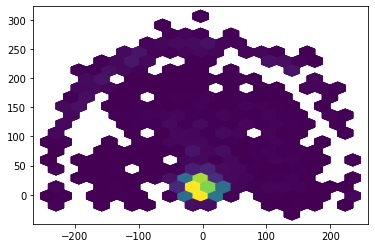

In [151]:
# Hexbin x and y shot coordinates
# Bin size will be 3.5
gridsize = 20
hexDF = temp[(temp['SHOT_ZONE_RANGE'] != "Back Court Shot")]
hexResults = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['SHOT_MADE_FLAG'], reduce_C_function=np.sum)
hexResults2 = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['SHOT_ATTEMPTED_FLAG'], reduce_C_function=np.sum)
hexResults3 = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['FGA_LA'], reduce_C_function=np.sum)
hexResults4 = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['FGM_LA'], reduce_C_function=np.sum)

coordinates = pd.DataFrame(hexResults.get_offsets(), columns=['x', 'y'])
FGM = pd.DataFrame(hexResults.get_array(), columns=['FGM'])
FGA = pd.DataFrame(hexResults2.get_array(), columns=['FGA'])
FGA_LA = pd.DataFrame(hexResults3.get_array(), columns=['FGA_LA'])
FGM_LA = pd.DataFrame(hexResults4.get_array(), columns=['FGM_LA'])
# filter to df with FGA > 0
refined_results = pd.concat([coordinates, FGM, FGA, FGA_LA, FGM_LA], axis='columns')
refined_results['FG_pct'] = refined_results['FGM'] / refined_results['FGA']
refined_results['FG_pct_LA'] = refined_results['FGM_LA'] / refined_results['FGA_LA']
refined_results['FG_pct_diff'] = refined_results['FG_pct'] - refined_results['FG_pct_LA']

In [ ]:
max_freq = 0.002
freq_by_hex = np.array([min(max_freq, i) for i in league_hexbin_stats['freq_by_hex']])
colorscale = 'YlOrRd'
marker_cmin = 0.1
marker_cmax = 0.6
ticktexts = [str(marker_cmin*100)+'%-', "", str(marker_cmax*100)+'%+']

fig = go.Figure()
draw_plotly_court(fig)
fig.add_trace(go.Scatter(
    x=xlocs, y=ylocs, mode='markers', name='markers',
    marker=dict(
        size=freq_by_hex, sizemode='area', sizeref=2. * max(freq_by_hex) / (11. ** 2), sizemin=2.5,
        color=accs_by_hex, colorscale=colorscale,
        colorbar=dict(
            thickness=15,
            x=0.84,
            y=0.87,
            yanchor='middle',
            len=0.2,
            title=dict(
                text="<B>Accuracy</B>",
                font=dict(
                    size=11,
                    color='#4d4d4d'
                ),
            ),
            tickvals=[marker_cmin, (marker_cmin + marker_cmax) / 2, marker_cmax],
            ticktext=ticktexts,
            tickfont=dict(
                size=11,
                color='#4d4d4d'
            )
        ),
        cmin=marker_cmin, cmax=marker_cmax,
        line=dict(width=1, color='#333333'), symbol='hexagon',
    ),
))
fig.show(config=dict(displayModeBar=False))

In [119]:
bin_df = refined_results
bin_df['bins'] = pd.cut(x = refined_results['FGA'], bins=[1,2,5,10,20,100], labels=['1-2', '2-5', '5-10', '10-20', '20+'])
# group bin_df by bins and sum FGA
bin_df = bin_df.groupby(['bins']).agg(FGA=('FGA', 'sum'))
bin_df

,FGA
bins,
1-2,262.0
2-5,270.0
5-10,84.0
10-20,64.0
20+,0.0


In [10]:
# Plot 'both' dataframe using plotly .addTrace and scatter with shot distance as the x axis and fg_pct_pl as the y axis
fig = go.Figure()
fig.add_trace(go.Scatter(x=both['SHOT_DISTANCE'], y=both['fg_pct_pl'], name="fg_pct_pl"))
fig.add_trace(go.Scatter(x=both['SHOT_DISTANCE'], y=both['fg_pct_la'], name="fg_pct_la"))
fig.show()

In [49]:
fig = px.scatter(y, x="SHOT_DISTANCE", y="fg_pct")
fig.show()